# Borrower reliability study

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/project/datasets/data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Data description## Описание данных

The file contains 12 columns and 21525 lines
* children - number of children in the family,
* days_employed - total employment history in days,
* dob_years - client's age in years,
* education - client's education level,
* education_id - education level identifier,
* family_status - marital status,
* family_status_id - marital status identifier,
* gender - client's gender,
* income_type - type of employment,
* debt - whether the client had any debts on loan repayment,
* total_income - monthly income,
* purpose - purpose of getting credit.

The number of values in the columns is different, which indicates missing values

## Step 2. Preprocessing data

### Processing missing values

Let's bring the categorical variables 'education', 'family_status', 'income_type', and 'purpose' to the same case.

In [4]:
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [5]:
df['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [6]:
df['education'] = df['education'].str.lower()

Checking

In [7]:
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [8]:
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [9]:
df['family_status'] = df['family_status'].str.lower()

Checking

In [10]:
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

In [11]:
df['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

The 'income_type' variable does not need to be reworked

The 'days_employed' column has negative values, which appears to be a data entry error

In [12]:
df['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

Change the negative values to positive values.

In [13]:
df['days_employed'] = df['days_employed'].abs()

In [14]:
df.groupby('income_type')['days_employed'].agg(['count','mean','median'])

,count,mean,median
income_type,,,
безработный,2,366413.652744,366413.652744
в декрете,1,3296.759962,3296.759962
госслужащий,1312,3399.896902,2689.368353
компаньон,4577,2111.524398,1547.382223
пенсионер,3443,365003.491245,365213.306266
предприниматель,1,520.848083,520.848083
сотрудник,10014,2326.499216,1574.202821
студент,1,578.751554,578.751554


The values for the "unemployed" and "retired" categories are incorrect.
Let's check by adjusting the filter for values less than 100 years old.

In [15]:
df['days_employed'].where((df['days_employed']  > 36500)).count()

3445

Replace the wrong values with NaN

In [16]:
df['days_employed'] = df['days_employed'].where((df['days_employed']  < 36500))

In [17]:
df.groupby('income_type')['days_employed'].agg(['count','mean','median'])

,count,mean,median
income_type,,,
безработный,0,NaN,NaN
в декрете,1,3296.759962,3296.759962
госслужащий,1312,3399.896902,2689.368353
компаньон,4577,2111.524398,1547.382223
пенсионер,0,NaN,NaN
предприниматель,1,520.848083,520.848083
сотрудник,10014,2326.499216,1574.202821
студент,1,578.751554,578.751554


In [18]:
df['days_employed'].mean()

2353.0159319988766

In [19]:
df['days_employed'].median()

1630.0193809778218

Replace the missing values in the 'days_employed' column with the median for the entire data set of years of service. The median method is chosen due to the fact that the distribution is asymmetric.

In [20]:
df['days_employed'] = df['days_employed'].fillna(value = 1630)

In [21]:
df[df['days_employed'] == 1630].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,1630.0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
12,0,1630.0,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
18,0,1630.0,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,1630.0,57,среднее,1,не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,1630.0,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости


In [22]:
df.isna().mean()

children            0.000000
days_employed       0.000000
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

There are gaps in the income data in the table, which is 10%. 

Let's remove the lines with no information about income. We don't know what the reason is for this omission. It may be a data entry error or the borrower's reluctance to provide this information.

In [23]:
df.dropna(subset = ['total_income'], inplace = True)

In [24]:
df = df.reset_index(drop = True)

In [25]:
df.isna().mean()

children            0.0
days_employed       0.0
dob_years           0.0
education           0.0
education_id        0.0
family_status       0.0
family_status_id    0.0
gender              0.0
income_type         0.0
debt                0.0
total_income        0.0
purpose             0.0
dtype: float64

Let's check the information about the number of children.

In [26]:
df['children'].value_counts()

 0     12710
 1      4343
 2      1851
 3       294
 20       67
-1        44
 4        34
 5         8
Name: children, dtype: int64

In [27]:
df[df['children'] == -1]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
259,-1,4417.703588,46,среднее,1,гражданский брак,1,F,сотрудник,0,102816.346412,профильное образование
634,-1,902.084528,50,среднее,1,женат / замужем,0,F,госслужащий,0,137882.899271,приобретение автомобиля
666,-1,3174.456205,57,среднее,1,женат / замужем,0,F,сотрудник,0,64268.044444,дополнительное образование
720,-1,1630.000000,54,среднее,1,не женат / не замужем,4,F,пенсионер,0,86293.724153,дополнительное образование
1226,-1,1195.264956,55,среднее,1,женат / замужем,0,F,компаньон,0,69550.699692,профильное образование
1740,-1,1461.303336,38,среднее,1,не женат / не замужем,4,M,сотрудник,0,109121.569013,покупка жилья
1871,-1,2539.761232,42,среднее,1,в разводе,3,F,компаньон,0,162638.609373,покупка жилья
3441,-1,3045.290443,26,среднее,1,гражданский брак,1,F,госслужащий,0,131892.785435,на проведение свадьбы
3785,-1,901.101738,41,среднее,1,женат / замужем,0,F,госслужащий,0,226375.766751,операции со своей недвижимостью
3968,-1,1630.000000,64,среднее,1,женат / замужем,0,F,пенсионер,0,163264.062064,покупка недвижимости


In 44 rows of the table we found the number of children "-1", possibly a typo when filling out the questionnaires. Let's replace "-1" with 1. 

In [28]:
df['children'] = df['children'].abs()

In [29]:
df[df['children'] == 20]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
547,20,880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
646,20,855.595512,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости
961,20,3310.411598,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования
2277,20,2714.161249,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью
2666,20,2161.591519,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля
...,...,...,...,...,...,...,...,...,...,...,...,...
18292,20,2695.079206,45,среднее,1,гражданский брак,1,M,сотрудник,1,177922.630435,на проведение свадьбы
18883,20,1240.257910,40,среднее,1,женат / замужем,0,F,сотрудник,1,133524.010303,свой автомобиль
19168,20,601.174883,37,среднее,1,женат / замужем,0,F,компаньон,0,102986.065978,профильное образование
19242,20,494.788448,52,среднее,1,женат / замужем,0,M,компаньон,0,156629.683642,операции со своей недвижимостью


Also in 67 cases, it is indicated that the number of children is 20. Most likely this is also a data entry error. Replace it with 2.

In [30]:
df['children'] = df['children'].replace([20],2)

In [31]:
df['children'].value_counts()

0    12710
1     4387
2     1918
3      294
4       34
5        8
Name: children, dtype: int64

### Conclusion

* Negative values in the 'days_employed' column have been eliminated. 
* Blanks in seniority data for pensioners and two unemployed have been replaced by the median. 
* Lines in categorical variables are converted to lower case.
* The values "-1" and "20" in the 'children' column have been changed to "1" and "2", respectively.

### Replacing the data type

In [32]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,1630.000000,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [33]:
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

Let's change the data type in the 'days_employed' column to integer, because the length of service is counted in days (according to the column name).

In [34]:
df['days_employed'] = df['days_employed'].astype(int)

### Conclusion.

The data types in the table match the information presented, except for the data in the 'days_employed' column, where the data type has been changed to integer.

### Processing duplicates

Count the number of identical entries in the table using the summation method.

In [35]:
duplicated_number = df.duplicated().sum()
duplicated_number

0

### Conclusion

The data do not contain duplicate entries.

### Lemmatization

In [36]:
from pymystem3 import Mystem
m = Mystem()

Let's evaluate the format of recording information about the purpose of the credit.

In [37]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'получение образования',
       'сделка с подержанным автомобилем', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее образование',
       'покупка жилья для сдачи

From the above list we can distinguish 8 groups:
* purchase of commercial real estate (1)
* home repair (2)
* home construction (3)
* wedding parties (4)
* buying a home (5)
* buying a car (6)
* getting an education (7)
* buying real estate (not necessarily a house, for example a garage or a summer house) (8)

Let's write a function that lematizes the line with the information about the purpose of the credit, and in order to avoid confusion returns an integer from 1 to 8 - the type of the credit purpose. The selected words are: commercial, repair, construction, wedding, housing, car, education, residential, and real estate.

In [38]:
def lemma(row):
    purpose = row['purpose']
    text = m.lemmatize(purpose)
    if 'коммерческий' in text:
        return 1 #'покупка коммерческой недвижимости'
    if 'ремонт' in text:
        return 2 #'ремонт жилья'
    if 'строительство' in text:
        return 3 #'строительство жилья'
    if 'свадьба' in text:
        return 4 #'свадьба'
    if 'жилье' in text:
        return 5 #'покупка жилья'
    if 'автомобиль' in text:
        return 6 #'приобретение автомобиля'
    if 'образование' in text:
        return 7 #'получение образования'
    if 'жилой' in text:
        return 5 #'покупка жилья'
    if 'недвижимость' in text:
        return 8 #'покупка недвижимости'
    

    


Let's apply the function "lemma" and add a column with the classification of the purpose of the credit by type

In [39]:
df['purpose_type'] = df.apply(lemma, axis=1) 

Check the number of unique values in the column.

In [40]:
df['purpose_type'].unique()

array([5, 6, 7, 4, 8, 1, 3, 2])

Check the total number of entries in the column.

In [41]:
df['purpose_type'].value_counts().sum()

19351

In [42]:
len(df)

19351

The number of records corresponds to the length of the table, nothing is lost.


Let's write a function to translate the numeric values from the purpose_type column into a readable format.

In [43]:
def clear_purpose(row):
    purpose = row['purpose_type']
    if purpose == 1:
        return 'покупка коммерческой недвижимости'
    if purpose == 2:
        return 'ремонт жилья'
    if purpose == 3:
        return 'строительство жилья'
    if purpose == 4:
        return 'свадьба'
    if purpose == 5:
        return 'покупка жилья'
    if purpose == 6:
        return 'приобретение автомобиля'
    if purpose == 7:
        return 'получение образования'
    if purpose == 8:
        return 'покупка недвижимости'

Add a column with information about the purpose of the loan using the function "clear_purpose".

In [44]:
df['clear_purpose'] = df.apply(clear_purpose, axis=1) 

In [45]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_type,clear_purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,5,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,6,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,5,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,7,получение образования
4,0,1630,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,4,свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,5,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,5,покупка жилья
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,7,получение образования
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,4,свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,5,покупка жилья


### Conclusion

Borrowers indicated the purpose of the loan differently. A column was added to the table to reflect the information about the purpose of the loan reduced to the same writing style - a total of 8 groups.

### Data categorization

In [46]:
education_dict=df[['education','education_id']]


In [47]:
education_dict = education_dict.drop_duplicates().reset_index(drop = True)

In [48]:
education_dict.sort_values('education_id')

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [49]:
family_dict=df[['family_status','family_status_id']]

In [50]:
family_dict = family_dict.drop_duplicates().reset_index(drop = True)

In [51]:
family_dict.sort_values('family_status_id')

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,не женат / не замужем,4


In [52]:
purpose_dict=df[['clear_purpose','purpose_type']]

In [53]:
purpose_dict = purpose_dict.drop_duplicates().reset_index(drop = True)

In [54]:
purpose_dict.sort_values('purpose_type')

,clear_purpose,purpose_type
5,покупка коммерческой недвижимости,1
7,ремонт жилья,2
6,строительство жилья,3
3,свадьба,4
0,покупка жилья,5
1,приобретение автомобиля,6
2,получение образования,7
4,покупка недвижимости,8


### Conclusion

The expanded table contains three pairs of columns with data combined into categories: education, marital status, and loan purpose . The data are suitable for further analysis.

## Step 3: Answering the Questions

- Is there a correlation between having children and paying back the loan on time?

In [55]:
df['debt'].agg(['count','mean'])

count    19351.000000
mean         0.081184
Name: debt, dtype: float64

The percentage of debtors in the entire sample is 8%.

In [56]:
df.groupby('children')['debt'].agg(['count','mean'])

,count,mean
children,,
0,12710,0.074902
1,4387,0.093230
2,1918,0.096455
3,294,0.074830
4,34,0.088235
5,8,0.000000


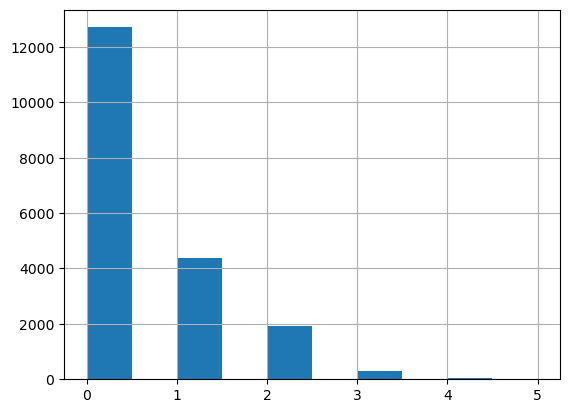

In [57]:
df['children'].hist()
plt.show()

To increase the homogeneity of the sample by the number of records, we divide families into three groups: 'no children', '1 - 2 children', and 'large families'.

In [58]:
def childrens_group(children):
    if children <= 0:
        return 'no children'
    if children <= 2:
        return '1 - 2 children'
    else:
        return 'large families'

In [59]:
df['children_group'] = df['children'].apply(childrens_group)

In [60]:
df.groupby('children_group')['debt'].agg(['count','mean']).round(2)

,count,mean
children_group,,
1 - 2 children,6305,0.09
large families,336,0.07
no children,12710,0.07


### Conclusion

* The analysis showed that the most reliable credit payers are people who have no children or people who have three or more children, the share of debtors among this group is 7%.
* Most of all people who do not pay back the loan on time are people with one or two children, the share of debtors in this group is 9%.

Probably, this ratio is connected with the fact that people who don't have children can better plan their expenses, and people with one or two children have a higher probability of "force majeure". In turn, families with many children receive subsidies from the state. 

- Is there a correlation between marital status and loan repayment on time?

In [61]:
df.groupby('family_status')['debt'].agg(['count','mean']).round(2)

,count,mean
family_status,,
в разводе,1083,0.07
вдовец / вдова,865,0.06
гражданский брак,3735,0.09
женат / замужем,11143,0.08
не женат / не замужем,2525,0.10


### Conclusion

* The most reliable payers of loans are widows and widowers, the share of debtors in this group is 6%. 
* 7% of divorced people do not pay back the loan on time. 
* Share of debtors who are in official marriage - 8%, in civil marriage - 9%.
* The largest number of people who have not returned the loan on time are not married, their share of 10%.


- Is there a correlation between income level and loan repayment on time?

In [62]:
df.groupby('total_income')['debt'].agg(['count','mean'])

,count,mean
total_income,,
2.066726e+04,1,1.0
2.120528e+04,1,0.0
2.136765e+04,1,0.0
2.169510e+04,1,0.0
2.189561e+04,1,0.0
...,...,...
1.711309e+06,1,0.0
1.715018e+06,1,0.0
1.726276e+06,1,0.0


Let's group the data by income level.

In [63]:
df['income_group1'] = pd.cut(df['total_income'],5)

In [64]:
df.groupby('income_group1')['debt'].agg(['count','mean']).round(2)

,count,mean
income_group1,,
"(18422.327, 469654.617]",19065,0.08
"(469654.617, 918641.97]",257,0.05
"(918641.97, 1367629.323]",21,0.05
"(1367629.323, 1816616.676]",6,0.00
"(1816616.676, 2265604.029]",2,0.50


In [65]:
df['income_group2'] = pd.qcut(df['total_income'],5)

In [66]:
df.groupby('income_group2')['debt'].agg(['count','mean']).round(2)

,count,mean
income_group2,,
"(20667.263, 94836.83]",3871,0.08
"(94836.83, 128279.674]",3870,0.08
"(128279.674, 164660.939]",3870,0.09
"(164660.939, 223107.554]",3870,0.09
"(223107.554, 2265604.029]",3870,0.07


We have 5 groups of 3870 records each, but the income values are not convenient to read. 


Let's split the income data into groups from 0 - 95000, 95000 - 130000, 130000 - 165000, 165000 - 225000, 225000 - 2230000 

In [67]:
df['income_group3'] = pd.cut(df['total_income'], [0, 95000, 130000, 165000, 225000, 2230000])

In [68]:
df.groupby('income_group3')['debt'].agg(['count','mean']).round(2)

,count,mean
income_group3,,
"(0, 95000]",3891,0.08
"(95000, 130000]",4051,0.08
"(130000, 165000]",3702,0.09
"(165000, 225000]",3934,0.08
"(225000, 2230000]",3772,0.07


### Conclusion

* The smallest share of debtors - 7% at an income over 225000
* The highest proportion of debtors - 8% is observed in the group whose income is 130000 to 165000
* Proportion of debtors with income up to 130000 and with income from 165000 to 225000 is 9%

The share of debtors when assessing the level of income varies from 7 to 9%

- How do the different purposes of a loan affect its repayment on time?

In [69]:
df.groupby('clear_purpose')['debt'].agg(['count','mean']).round(2)

,count,mean
clear_purpose,,
покупка жилья,4039,0.07
покупка коммерческой недвижимости,1178,0.07
покупка недвижимости,2298,0.08
получение образования,3597,0.09
приобретение автомобиля,3897,0.09
ремонт жилья,542,0.06
свадьба,2099,0.08
строительство жилья,1701,0.08


### Conclusion

* The most trustworthy borrowers are people who take out a home repair loan; the percentage of debtors in this group is 6%
* Borrowers who take credit for the purchase of residential or commercial real estate are also trustworthy. The share of debtors is 7%.
* The percentage of debtors who take out a loan for a wedding, home construction or real estate purchase is slightly higher at 8%.
* The largest percentage of people who do not pay back a loan on time is for "buying a car" and "getting an education" (a car is a fragile thing, and education does not guarantee employment) and is 9%.

## Step 4: General conclusion

* The average percentage of loan debtors in the entire sample is 8%. 
* Borrowers without children and borrowers with many children are more reliable than borrowers with one or two children. Widows and widowers are the most likely to repay loans on time (6% of borrowers), followed by divorced people (7%), people legally married (8%) and common-law spouses (9%). Unmarried borrowers have loan debt in 10% of cases.   
* The smallest share of debtors is in the group with high income and is 7%. Borrowers with average income (according to the data provided) have loan debt in 9% of cases.
* The most reliable borrowers are people who take credit for home repair or purchase, the share of debtors on a loan for these needs is 6 and 7%, respectively. 7% of borrowers who take credit for the purchase of commercial real estate do not pay back the loan on time. 8% of borrowers who take a loan for a wedding, home construction or purchase of real estate do not repay the loan on time, which corresponds to the average percentage of debtors in the entire sample. In the case of buying a car or getting an education, 9% of borrowers do not repay the loan on time. 